<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/investigacion_dengue/blob/main/machine_learning/2_svm/11_seminario_nov_15_2023/11_seminario_ml_sat_dengue_nov_15_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

### [Video de apoyo](https://www.youtube.com/watch?v=-sNbp4PIuV4)

<img src = 'https://github.com/marco-canas/investigacion_dengue/blob/main/machine_learning/images/calculo_diferencial_2023-09-22%20at%2012.12.55%20PM.jpeg?raw=true'>

Maestros Puerto libertador:  

<img src = 'https://github.com/marco-canas/investigacion_dengue/blob/main/machine_learning/images/maestros_puerto_libertador_2023-09-25.jpeg?raw=true'>

# Los jóvenes investigadores  

<img src = 'https://github.com/marco-canas/didactica_ciencia_datos/blob/main/4_images/janis_joseph_marco.jpg?raw=true'>

# Vocabulary

* inplace: en su lugar, sustituir o hacer una copia modificada. 
* Key Error: Error de nombre de atributo o variable. 
* see caveats: ver advertencias.

# QR de Antioquia mira su cielo

Este es un aporte del Joven Investigador Yeifry Uribe de la Licenciatura en matemáticas.

<img src = 'https://github.com/marco-canas/investigacion_dengue/blob/main/machine_learning/images/qr_amsc.jpeg?raw=true'>

# Seminario 11 en Machine learning para SAT-dengue del Miércoles 15 de Noviembre 2023. 4 PM. 

## Objetivo



* Dar a conocer el [archivo agroclimático de Fedearroz](https://clima.fedearroz.com.co/)


* [Archivo meteorológico de Puerto Libertador](https://www.meteoblue.com/es/tiempo/historyclimate/weatherarchive/puerto-libertador_colombia_11900983)


* Obtención de los datos de las estaciones del proyecto Antioquia mira su cielo [obtenga los datos de Antioquia Mira su Cielo Aquí(AMSC)](http://54.146.188.73:8501/)

* [Datos Facom](http://44.201.207.176/pagina2/estructura.html)

* Revisión de los datos de pluviometría del la estación UdeA Caucasia



* Visualización de los datos de AMSC con plotly


* Comparación de las fronteras de decisión asociadas a los modelos de regresión logística y Maquina de Soporte vectorial. 



In [ ]:
# Mapa conceptual
import matplotlib.pyplot as plt 
import networkx as nx 

# Crear un objeto de grafo dirigido

G = nx.DiGraph() 

# Paso 3: Agregar nodos al grafo para representar conceptos clave de las series de tiempo

lista_de_conceptos = ["Series de Tiempo", 'prediccion']

G.add_nodes_from(lista_de_conceptos)



#Paso 4: Agregar bordes que conecten los nodos para mostrar relaciones
lista_vinculos = [("Series de Tiempo", 'prediccion')]

G.add_edges_from(lista_vinculos)



# Dibujar el mapa conceptual utilizando networkx y matplotlib

pos = nx.spring_layout(G, seed = 48) # con ubicaciones aleatorias fijadas
labels = {node:node for node in G.nodes()}

nx.draw(G, pos, with_labels = True, node_size = 8000)

plt.title('Mapa conceptual de series de tiempo')
plt.savefig('/home/marco/Documentos/investigacion/investigacion_dengue/machine_learning/images/mapa_conceptuual_series_de_tiempo.png')
plt.show()


## [Video para el mapa conceptual del seminario]()

## Obtención y visualización de los datos de AMSC

1. Ir a la página del proyecto [AMSC]()
2. Seleccionar la variable meteorológica que quiere. 
3. Seleccionar el invervalo de tiempo 
4. Dar el correo donde quiere que le lleguen los datos como archivo .csv

In [16]:
import pandas as pd # pandas para procesamiento de datos en python

url = 'https://raw.githubusercontent.com/marco-canas/didactica_ciencia_datos/main/3_datasets/antioquia_mira_su_cielo/caucasia_yarumal_julio_a_noviembre_2023.csv'

df = pd.read_csv(url)

In [ ]:
df.tail() 

# Organización del DataFrame de tal manera que la fecha sea la familia indexante. 

In [ ]:
df.keys()


In [17]:
df= df[['fecha', 'temperatura', 'presion', 'humedad_relativa', 'precipitacion', 'nombre_completo']]
df 

fecha  temperatura     presion  humedad_relativa  \
0       2023-09-19 03:50:00     14.88889   777.27158                83   
1       2023-09-19 03:51:00     14.83333   777.33931                83   
2       2023-09-19 03:52:00     14.83333   777.30545                83   
3       2023-09-19 03:53:00     14.77778   777.20386                83   
4       2023-09-19 03:54:00     14.77778   777.20386                83   
...                     ...          ...         ...               ...   
307670  2023-11-10 11:15:03     30.66667  1007.34914                75   
307671  2023-11-10 11:16:00     30.72222  1007.31527                76   
307672  2023-11-10 11:17:00     30.77778  1007.24754                77   
307673  2023-11-10 11:18:00     30.83333  1007.28141                76   
307674  2023-11-10 11:19:00     30.88889  1007.24754                75   

        precipitacion nombre_completo  
0                 0.0    UdeA Yarumal  
1                 0.0    UdeA Yarumal  
2                 0.0    UdeA Yarumal  
3                 0.0    UdeA Yarumal  
4                 0.0    UdeA Yarumal  
...               ...             ...  
307670            0.0   UdeA Caucasia  
307671            0.0   UdeA Caucasia  
307672            0.0   UdeA Caucasia  
307673            0.0   UdeA Caucasia  
307674            0.0   UdeA Caucasia  

[307675 rows x 6 columns]

In [ ]:
df.index

In [18]:
df.index = df.fecha  # aher que la facha sea la que indize el dataframe

In [5]:
df

fecha  temperatura     presion  \
fecha                                                               
2023-09-19 03:50:00  2023-09-19 03:50:00     14.88889   777.27158   
2023-09-19 03:51:00  2023-09-19 03:51:00     14.83333   777.33931   
2023-09-19 03:52:00  2023-09-19 03:52:00     14.83333   777.30545   
2023-09-19 03:53:00  2023-09-19 03:53:00     14.77778   777.20386   
2023-09-19 03:54:00  2023-09-19 03:54:00     14.77778   777.20386   
...                                  ...          ...         ...   
2023-11-10 11:15:03  2023-11-10 11:15:03     30.66667  1007.34914   
2023-11-10 11:16:00  2023-11-10 11:16:00     30.72222  1007.31527   
2023-11-10 11:17:00  2023-11-10 11:17:00     30.77778  1007.24754   
2023-11-10 11:18:00  2023-11-10 11:18:00     30.83333  1007.28141   
2023-11-10 11:19:00  2023-11-10 11:19:00     30.88889  1007.24754   

                     humedad_relativa  precipitacion nombre_completo  
fecha                                                                 
2023-09-19 03:50:00                83            0.0    UdeA Yarumal  
2023-09-19 03:51:00                83            0.0    UdeA Yarumal  
2023-09-19 03:52:00                83            0.0    UdeA Yarumal  
2023-09-19 03:53:00                83            0.0    UdeA Yarumal  
2023-09-19 03:54:00                83            0.0    UdeA Yarumal  
...                               ...            ...             ...  
2023-11-10 11:15:03                75            0.0   UdeA Caucasia  
2023-11-10 11:16:00                76            0.0   UdeA Caucasia  
2023-11-10 11:17:00                77            0.0   UdeA Caucasia  
2023-11-10 11:18:00                76            0.0   UdeA Caucasia  
2023-11-10 11:19:00                75            0.0   UdeA Caucasia  

[307675 rows x 6 columns]

In [ ]:
df.keys()


In [19]:
df = df[['temperatura', 'presion', 'humedad_relativa', 'precipitacion', 'nombre_completo']]  

In [20]:
df

temperatura     presion  humedad_relativa  precipitacion  \
fecha                                                                           
2023-09-19 03:50:00     14.88889   777.27158                83            0.0   
2023-09-19 03:51:00     14.83333   777.33931                83            0.0   
2023-09-19 03:52:00     14.83333   777.30545                83            0.0   
2023-09-19 03:53:00     14.77778   777.20386                83            0.0   
2023-09-19 03:54:00     14.77778   777.20386                83            0.0   
...                          ...         ...               ...            ...   
2023-11-10 11:15:03     30.66667  1007.34914                75            0.0   
2023-11-10 11:16:00     30.72222  1007.31527                76            0.0   
2023-11-10 11:17:00     30.77778  1007.24754                77            0.0   
2023-11-10 11:18:00     30.83333  1007.28141                76            0.0   
2023-11-10 11:19:00     30.88889  1007.24754                75            0.0   

                    nombre_completo  
fecha                                
2023-09-19 03:50:00    UdeA Yarumal  
2023-09-19 03:51:00    UdeA Yarumal  
2023-09-19 03:52:00    UdeA Yarumal  
2023-09-19 03:53:00    UdeA Yarumal  
2023-09-19 03:54:00    UdeA Yarumal  
...                             ...  
2023-11-10 11:15:03   UdeA Caucasia  
2023-11-10 11:16:00   UdeA Caucasia  
2023-11-10 11:17:00   UdeA Caucasia  
2023-11-10 11:18:00   UdeA Caucasia  
2023-11-10 11:19:00   UdeA Caucasia  

[307675 rows x 5 columns]

## [Video de apoyo al proceso de vorver la fecha como la familia idexante]()

# Visualización tabular de los datos



In [ ]:
df.head(7)


In [ ]:
df.tail(7)


In [ ]:
df.info() # para ver tipos de variables y datos faltantes


In [21]:
df.rename(columns = {'nombre_completo': 'municipio'}, inplace = True)  
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
df

/tmp/ipykernel_24685/2322381785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'nombre_completo': 'municipio'}, inplace = True)


temperatura     presion  humedad_relativa  precipitacion  \
fecha                                                                           
2023-09-19 03:50:00     14.88889   777.27158                83            0.0   
2023-09-19 03:51:00     14.83333   777.33931                83            0.0   
2023-09-19 03:52:00     14.83333   777.30545                83            0.0   
2023-09-19 03:53:00     14.77778   777.20386                83            0.0   
2023-09-19 03:54:00     14.77778   777.20386                83            0.0   
...                          ...         ...               ...            ...   
2023-11-10 11:15:03     30.66667  1007.34914                75            0.0   
2023-11-10 11:16:00     30.72222  1007.31527                76            0.0   
2023-11-10 11:17:00     30.77778  1007.24754                77            0.0   
2023-11-10 11:18:00     30.83333  1007.28141                76            0.0   
2023-11-10 11:19:00     30.88889  1007.24754                75            0.0   

                         municipio  
fecha                               
2023-09-19 03:50:00   UdeA Yarumal  
2023-09-19 03:51:00   UdeA Yarumal  
2023-09-19 03:52:00   UdeA Yarumal  
2023-09-19 03:53:00   UdeA Yarumal  
2023-09-19 03:54:00   UdeA Yarumal  
...                            ...  
2023-11-10 11:15:03  UdeA Caucasia  
2023-11-10 11:16:00  UdeA Caucasia  
2023-11-10 11:17:00  UdeA Caucasia  
2023-11-10 11:18:00  UdeA Caucasia  
2023-11-10 11:19:00  UdeA Caucasia  

[307675 rows x 5 columns]

In [22]:
df 

temperatura     presion  humedad_relativa  precipitacion  \
fecha                                                                           
2023-09-19 03:50:00     14.88889   777.27158                83            0.0   
2023-09-19 03:51:00     14.83333   777.33931                83            0.0   
2023-09-19 03:52:00     14.83333   777.30545                83            0.0   
2023-09-19 03:53:00     14.77778   777.20386                83            0.0   
2023-09-19 03:54:00     14.77778   777.20386                83            0.0   
...                          ...         ...               ...            ...   
2023-11-10 11:15:03     30.66667  1007.34914                75            0.0   
2023-11-10 11:16:00     30.72222  1007.31527                76            0.0   
2023-11-10 11:17:00     30.77778  1007.24754                77            0.0   
2023-11-10 11:18:00     30.83333  1007.28141                76            0.0   
2023-11-10 11:19:00     30.88889  1007.24754                75            0.0   

                         municipio  
fecha                               
2023-09-19 03:50:00   UdeA Yarumal  
2023-09-19 03:51:00   UdeA Yarumal  
2023-09-19 03:52:00   UdeA Yarumal  
2023-09-19 03:53:00   UdeA Yarumal  
2023-09-19 03:54:00   UdeA Yarumal  
...                            ...  
2023-11-10 11:15:03  UdeA Caucasia  
2023-11-10 11:16:00  UdeA Caucasia  
2023-11-10 11:17:00  UdeA Caucasia  
2023-11-10 11:18:00  UdeA Caucasia  
2023-11-10 11:19:00  UdeA Caucasia  

[307675 rows x 5 columns]

In [ ]:
df.municipio.value_counts()

In [ ]:
df.loc[df.municipio == 'UdeA Caucasia'].describe() # ver parámetros estadísticos de las variables cuantitativas


In [ ]:
df.loc[df.municipio == 'UdeA Yarumal'].describe() # ver parámetros estadísticos de las variables cuantitativas

# Todas las conclusiones o inferencias que saque de la visualización tabular

* No hay datos faltantes
* la variable objetivo es una variable categórica binaria. 

## [Video de apoyo a la visualización tabular](https://www.youtube.com/watch?v=cZM4JVT-N1o) 

# Visualización Gráfica de los datos

# Visualización de cada uno de los atributos predictores y de la variable objetivo. 

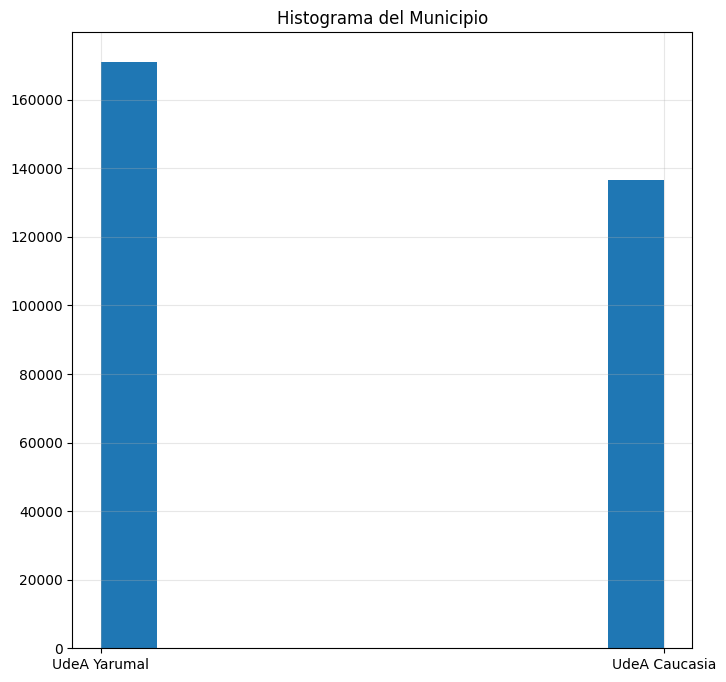

In [9]:
import matplotlib.pyplot as plt # Herramienta de visualización científica

plt.figure(figsize = (8,8))

plt.title('Histograma del Municipio')

plt.hist(df.municipio)

plt.grid(alpha = 0.3)

plt.savefig('/home/marco/Documentos/investigacion/investigacion_dengue/machine_learning/images/diagrama_barras_municipio.jpg')


plt.show()


## Infererencias de la lectura del gráfico de barras

* Las clases están desbalancedas. 

In [13]:
import matplotlib.pyplot as plt # Herramienta de visualización científica

plt.figure(figsize = (8,8))

plt.title('Histograma del Temperatura en Caucasia')

plt.hist(df.temperatura.loc[df.municipio=='UdeA Caucasia'])

plt.grid(alpha = 0.3)

plt.savefig('/home/marco/Documentos/investigacion/investigacion_dengue/machine_learning/images/histograma_temperatura_caucasia.jpg')


plt.show()

In [12]:
import matplotlib.pyplot as plt # Herramienta de visualización científica

plt.figure(figsize = (8,8))

plt.title('Histograma del Temperatura en Yarumal')

plt.hist(df.temperatura.loc[df.municipio=='UdeA Yarumal'])

plt.grid(alpha = 0.3)

plt.savefig('/home/marco/Documentos/investigacion/investigacion_dengue/machine_learning/images/histograma_temperatura_yarumal.jpg')


plt.show()

# Paralelo de histogramas para Temperatura

In [16]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.title('Temperatura en Yarumal')
plt.hist(df.temperatura.loc[df.municipio=='UdeA Yarumal'])

plt.grid(alpha = 0.3)

plt.subplot(1, 2, 2) 
plt.title('Temperatura en Caucasia')
plt.hist(df.temperatura.loc[df.municipio=='UdeA Caucasia'])

plt.grid(alpha = 0.3)

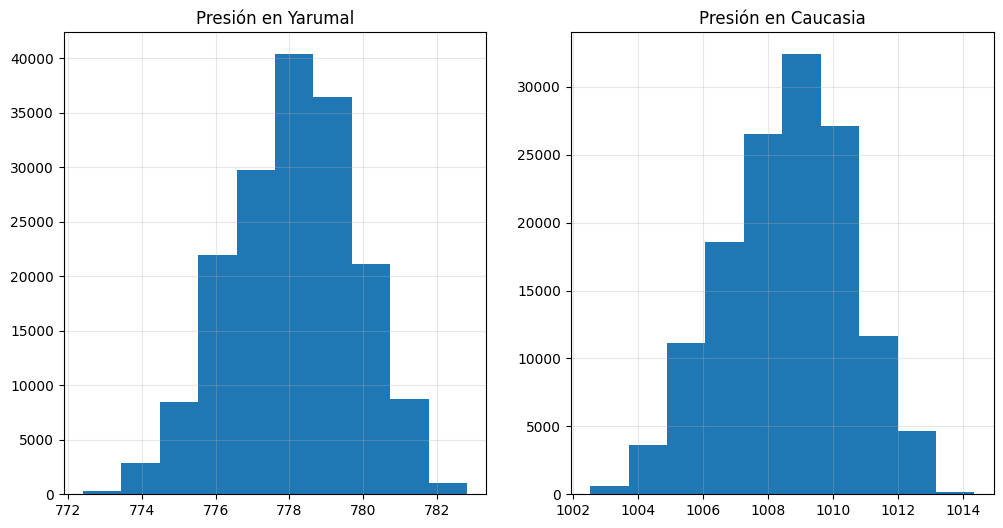

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.title('Presión en Yarumal')
plt.hist(df.presion.loc[df.municipio=='UdeA Yarumal'])

plt.grid(alpha = 0.3)

plt.subplot(1, 2, 2) 
plt.title('Presión en Caucasia')
plt.hist(df.presion.loc[df.municipio=='UdeA Caucasia'])

plt.grid(alpha = 0.3)

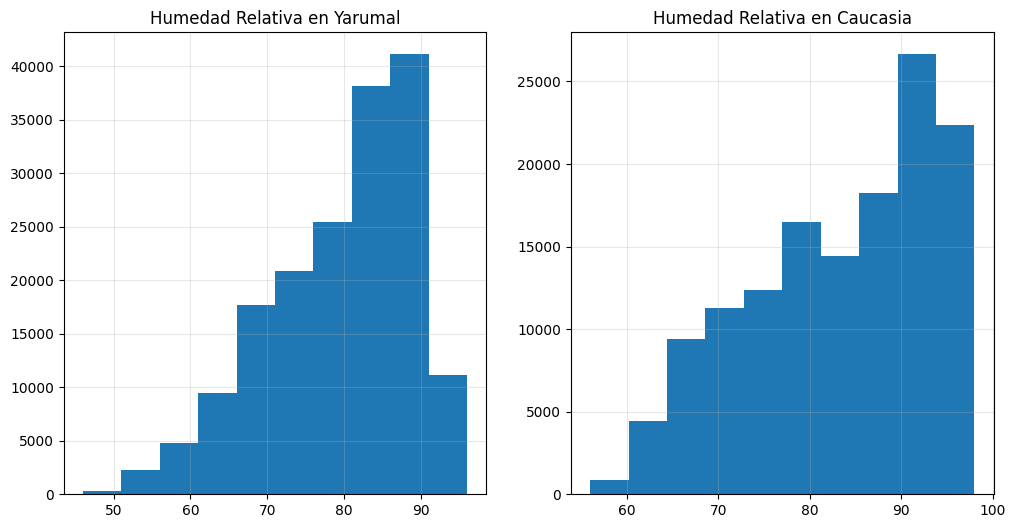

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.title('Humedad Relativa en Yarumal')
plt.hist(df.humedad_relativa.loc[df.municipio=='UdeA Yarumal'])

plt.grid(alpha = 0.3)

plt.subplot(1, 2, 2) 
plt.title('Humedad Relativa en Caucasia')
plt.hist(df.humedad_relativa.loc[df.municipio=='UdeA Caucasia'])

plt.grid(alpha = 0.3)

# Interencias de los tres paralelos de gráficos.

* En cuanto a la humadad, las dos clases se traslapan, mientras que en cuanto a la temperatura y la presión no. 

# Paralelos para diagrama de Cajas y bigotes



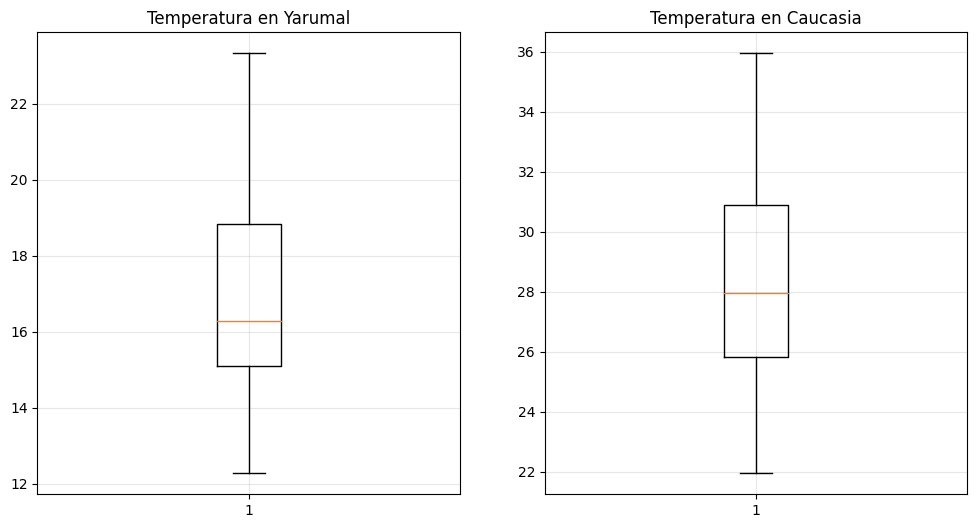

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.title('Temperatura en Yarumal')
plt.boxplot(df.temperatura.loc[df.municipio=='UdeA Yarumal'])

plt.grid(alpha = 0.3)

plt.subplot(1, 2, 2) 
plt.title('Temperatura en Caucasia')
plt.boxplot(df.temperatura.loc[df.municipio=='UdeA Caucasia'])

plt.grid(alpha = 0.3)

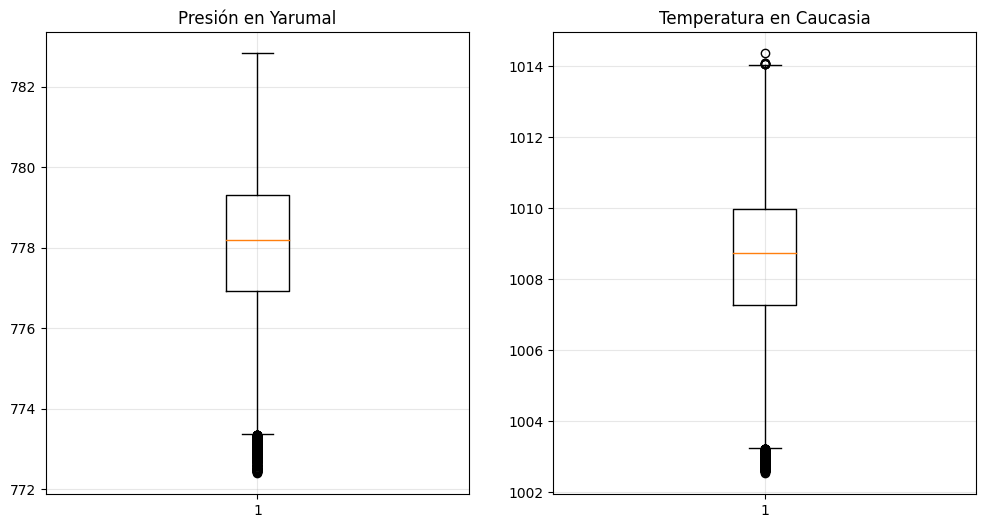

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.title('Presión en Yarumal')
plt.boxplot(df.presion.loc[df.municipio=='UdeA Yarumal'])

plt.grid(alpha = 0.3)

plt.subplot(1, 2, 2) 
plt.title('Temperatura en Caucasia')
plt.boxplot(df.presion.loc[df.municipio=='UdeA Caucasia'])

plt.grid(alpha = 0.3)

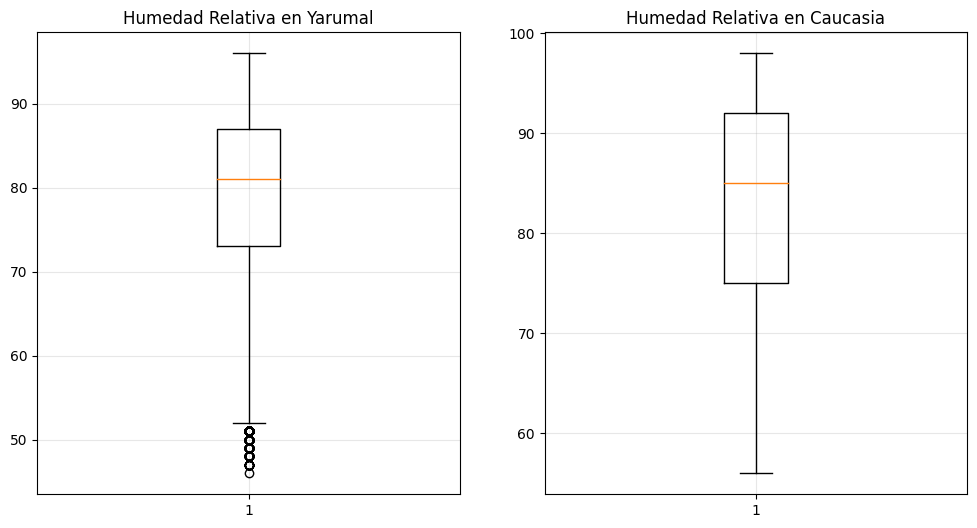

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.title('Humedad Relativa en Yarumal')
plt.boxplot(df.humedad_relativa.loc[df.municipio=='UdeA Yarumal'])

plt.grid(alpha = 0.3)

plt.subplot(1, 2, 2) 
plt.title('Humedad Relativa en Caucasia')
plt.boxplot(df.humedad_relativa.loc[df.municipio=='UdeA Caucasia'])

plt.grid(alpha = 0.3)

## [Video de apoyo a la visualización gráfica pero por atributo](https://www.youtube.com/watch?v=vk5l7MirgEA)

# Gráficos de comparación de atributos

In [15]:
list(enumerate(df.municipio))

[(0, 'yarumal'),
 (1, 'yarumal'),
 (2, 'yarumal'),
 (3, 'yarumal'),
 (4, 'yarumal'),
 (5, 'yarumal'),
 (6, 'yarumal'),
 (7, 'yarumal'),
 (8, 'yarumal'),
 (9, 'yarumal'),
 (10, 'yarumal'),
 (11, 'yarumal'),
 (12, 'yarumal'),
 (13, 'yarumal'),
 (14, 'yarumal'),
 (15, 'yarumal'),
 (16, 'yarumal'),
 (17, 'yarumal'),
 (18, 'yarumal'),
 (19, 'yarumal'),
 (20, 'yarumal'),
 (21, 'yarumal'),
 (22, 'yarumal'),
 (23, 'yarumal'),
 (24, 'yarumal'),
 (25, 'yarumal'),
 (26, 'yarumal'),
 (27, 'yarumal'),
 (28, 'yarumal'),
 (29, 'yarumal'),
 (30, 'yarumal'),
 (31, 'yarumal'),
 (32, 'yarumal'),
 (33, 'yarumal'),
 (34, 'yarumal'),
 (35, 'yarumal'),
 (36, 'yarumal'),
 (37, 'yarumal'),
 (38, 'yarumal'),
 (39, 'yarumal'),
 (40, 'yarumal'),
 (41, 'yarumal'),
 (42, 'yarumal'),
 (43, 'yarumal'),
 (44, 'yarumal'),
 (45, 'yarumal'),
 (46, 'yarumal'),
 (47, 'yarumal'),
 (48, 'yarumal'),
 (49, 'yarumal'),
 (50, 'yarumal'),
 (51, 'yarumal'),
 (52, 'yarumal'),
 (53, 'yarumal'),
 (54, 'yarumal'),
 (55, 'yarumal'),
 (

In [10]:
for indice, valor in enumerate(df.municipio): 
    if valor =='Udea Caucasia':
        df.municipio[indice] = 'caucasia'
    elif valor =='UdeA Yarumal':
        df.municipio[indice] = 'yarumal'    

/tmp/ipykernel_24685/4256936623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.municipio[indice] = 'yarumal'
/tmp/ipykernel_24685/4256936623.py:5: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  df.municipio[indice] = 'yarumal'
/tmp/ipykernel_24685/4256936623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.municipio[indice] = 'yarumal'
/tmp/ipykernel_24685/4256936623.py:5: FutureWarning: Series.__setitem__ treating k

KeyboardInterrupt: 

In [11]:
df 

temperatura     presion  humedad_relativa  precipitacion  \
fecha                                                                           
2023-09-19 03:50:00     14.88889   777.27158                83            0.0   
2023-09-19 03:51:00     14.83333   777.33931                83            0.0   
2023-09-19 03:52:00     14.83333   777.30545                83            0.0   
2023-09-19 03:53:00     14.77778   777.20386                83            0.0   
2023-09-19 03:54:00     14.77778   777.20386                83            0.0   
...                          ...         ...               ...            ...   
2023-11-10 11:15:03     30.66667  1007.34914                75            0.0   
2023-11-10 11:16:00     30.72222  1007.31527                76            0.0   
2023-11-10 11:17:00     30.77778  1007.24754                77            0.0   
2023-11-10 11:18:00     30.83333  1007.28141                76            0.0   
2023-11-10 11:19:00     30.88889  1007.24754                75            0.0   

                         municipio  
fecha                               
2023-09-19 03:50:00        yarumal  
2023-09-19 03:51:00        yarumal  
2023-09-19 03:52:00        yarumal  
2023-09-19 03:53:00        yarumal  
2023-09-19 03:54:00        yarumal  
...                            ...  
2023-11-10 11:15:03  UdeA Caucasia  
2023-11-10 11:16:00  UdeA Caucasia  
2023-11-10 11:17:00  UdeA Caucasia  
2023-11-10 11:18:00  UdeA Caucasia  
2023-11-10 11:19:00  UdeA Caucasia  

[307675 rows x 5 columns]

In [ ]:
# Diagrama de dispersión para temperatura y presion por cada municipio

import numpy as np 
import matpplotlib.pyplot as plt 

plt.figure()
plt.title('Temperatura vs presión en Caucasia')
plt.xlabel()
plt.ylabel()
plt.grid(alpha = 0.3)
plt.scatter(df.temperatura.loc[df.municipio=='UdeA Caucasia'])
plt.savefig('scatter_temperatura_caucasia.png')

plt.show()

In [ ]:
# Diagrama de dispersión para temperatura y presion por cada municipio

import numpy as np 
import matpplotlib.pyplot as plt 

plt.figure()
plt.title('Temperatura vs Presión en Yarumal')
plt.xlabel()
plt.ylabel()
plt.grid(alpha = 0.3)

plt.savefig('scatter_temperatura_caucasia.png')

plt.show()

# Grafica de las clases son la frontera de decisión

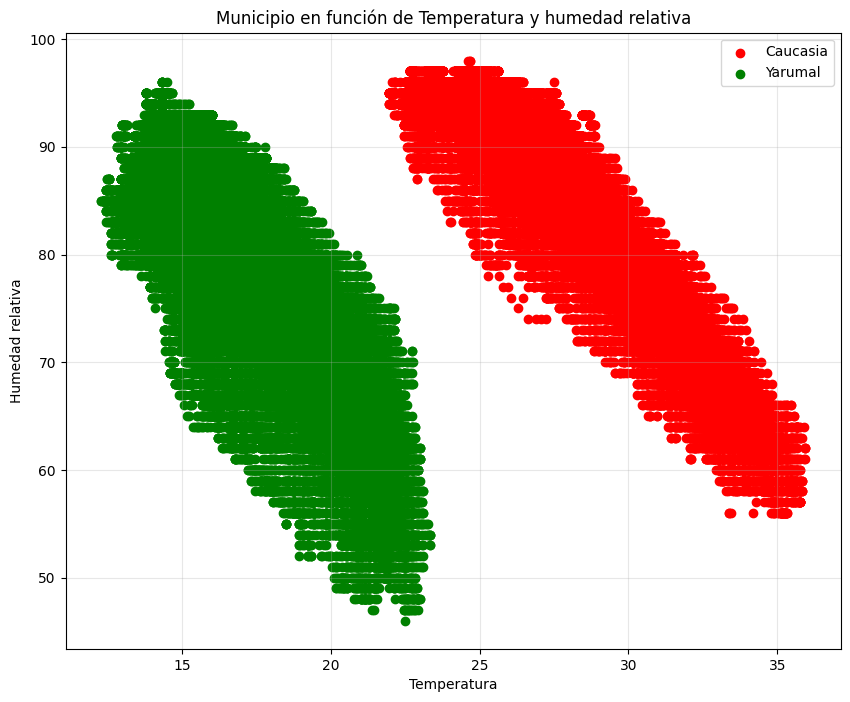

In [26]:
# Gráfica de los datos: Municipio en función de la temperatura y humedad relativa

import numpy as np 
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 8))


plt.title('Municipio en función de Temperatura y humedad relativa')
plt.xlabel('Temperatura')
plt.ylabel('Humedad relativa')
plt.grid(alpha = 0.3)

plt.scatter(df.temperatura.loc[df.municipio=='UdeA Caucasia'], df.humedad_relativa.loc[df.municipio=='UdeA Caucasia'], \
            color = 'red', label = 'Caucasia')

plt.scatter(df.temperatura.loc[df.municipio=='UdeA Yarumal'], df.humedad_relativa.loc[df.municipio=='UdeA Yarumal'], \
            color = 'green', label = 'Yarumal')


plt.legend()

plt.savefig('scatter_temperatura_humedad_caucasia_yarumal.png')

plt.show()

In [37]:
(df.municipio=='UdeA Caucasia').value_counts()

municipio
False    171107
True     136568
Name: count, dtype: int64

In [38]:
(df.municipio=='UdeA Caucasia').astype(np.int64).values

array([0, 0, 0, ..., 1, 1, 1])

In [39]:
X, y = df[['temperatura', 'humedad_relativa']].values, (df.municipio=='UdeA Caucasia').astype(np.int64).values

# Modelación o Clasificación binaria con SVM y Logistic Regression

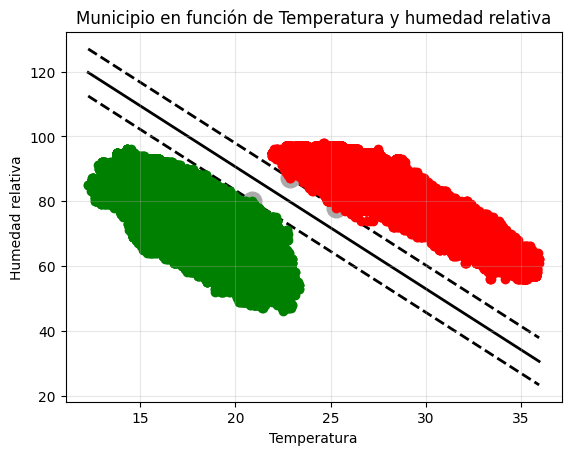

In [42]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=10.0)

svm_clf.fit(X, y)

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b_ = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b_ / w[1] # recta de la forma mx + b

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2) # recta que pasa arriba de la frontera de decisión
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2) # borde inferior de la margen 
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA', zorder=-1)  # trazo de los vectores de soporte 

plt.title('Municipio en función de Temperatura y humedad relativa')
plt.xlabel('Temperatura')
plt.ylabel('Humedad relativa')
plt.grid(alpha = 0.3)

plt.scatter(df.temperatura.loc[df.municipio=='UdeA Caucasia'], df.humedad_relativa.loc[df.municipio=='UdeA Caucasia'], \
            color = 'red', label = 'Caucasia') # grafica de la clase positiva

plt.scatter(df.temperatura.loc[df.municipio=='UdeA Yarumal'], df.humedad_relativa.loc[df.municipio=='UdeA Yarumal'], \
            color = 'green', label = 'Yarumal') # grafica de la clase negativa


    
plot_svc_decision_boundary(svm_clf, df.temperatura.min(), df.temperatura.max()) # grafica de la frontera de decisión


# https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb





## [Video de apoyo al entrenamiento de la máquina de soporte vectorial]()

In [ ]:
# Entregar el modelo de regresión logística 

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)



# https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb

# Vocubulary  

* support: soporte
* versatile: 
* capable:  
* performing: 
* Logitic Regression: Regresión logística. 
* support vector machine: Maquina de soporte vectorial
* linear:. lineal 

# Máquinas de soporte vectorial según Geron


# Chapter 5. Support Vector Machines (Página 219)

### [Video de apoyo]()


A Support Vector Machine (SVM) is a powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection.   

Una máquina de vectores de soporte (SVM) es un modelo de aprendizaje automático potente y versátil, capaz de realizar clasificación, regresión e incluso detección de valores atípicos lineales o no lineales.

It is one of the most popular models in Machine Learning, and anyone interested in Machine Learning should have it in their toolbox.   

Es uno de los modelos más populares de Machine Learning y cualquier persona interesada en Machine Learning debería tenerlo en su caja de herramientas.

SVMs are particularly well suited for classification of complex small- or medium-sized datasets.

Las SVM son particularmente adecuadas para la clasificación de conjuntos de datos complejos de tamaño pequeño o mediano.

This chapter will explain the core concepts of SVMs, how to use them, and how they work.  

Este capítulo explicará los conceptos básicos de las SVM, cómo usarlas y cómo funcionan.  


# Linear SVM Classification


The fundamental idea behind SVMs is best explained with some pictures. 

La idea fundamental detrás de las SVM se explica mejor con algunas imágenes.

Figure 5-1 shows part of the iris dataset that was introduced at the end of Chapter 4. 

La Figura 5-1 muestra parte del conjunto de datos del iris que se presentó al final del Capítulo 4.

In [ ]:
# extra code – this cell generates and saves Figure 5–1
# https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb

#importación de las librerías 

from sklearn import datasets # obtención de datos

import matplotlib.pyplot as plt  # visualización gráfica en diagramas bidimensionales
import numpy as np # Visualización tabular y manipulación de datos



from sklearn.svm import SVC


iris = datasets.load_iris(as_frame=True) # obtiene los datos como estructuta de Bunch y los guarda en la variable iris


# Las florez de iris 

<img src = 'https://raw.githubusercontent.com/JoePortilla/IrisDataset-EDA/main/img/iris_flowers.png'>

# [Historia del dataset de florez de iris](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris)



In [ ]:
type(iris)  # para ver la estructura de los datos (Buch)

In [ ]:
iris.keys()  # obtención de las llaves para obtención de los datos

In [ ]:
dic = {'nombre':'marco'}

dic['nombre'] 

In [ ]:
iris.data  # acceso a las variables predictoras en forma de DataFrame


In [ ]:
iris.target.value_counts()  # la freciencia de cada uno de los tipos de florez de iris. 

In [ ]:
type(iris) 

In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
X 

In [ ]:
y = iris.target
y

# Visualización gráfica del dataset de florez de iris en cuanto a los parámetros de longitud y ancho de pétalo



La clase positiva es ser setosa 

y la clase negativa es ser versicolor. 




In [ ]:
y = iris.target 
X = iris.data 
setosa_or_versicolor = (y == 0) | (y == 1)
setosa_or_versicolor.value_counts() 

In [ ]:

# Tomar del dataset solo las 100 instancias sobre los datos de setosa y versicolor. 

X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor] # así la clase positiva a a ser el ser setosa o virgínica. 


In [ ]:
X.shape, y.shape

In [ ]:
False | False 

In [ ]:
x = 5  # Representación binaria: 0101
y = 3  # Representación binaria: 0011
resultado = x | y  # Operación OR a nivel de bits
print(resultado)  # Output: 7 (Representación binaria: 0111)


# Aprendamos sobre la diferencia entre los operadores or y | de python

En Python, `or` y `|` son dos operadores diferentes que se utilizan en contextos distintos.

1. **Operador `or`:**
   - `or` es un operador lógico que se utiliza para combinar dos expresiones booleanas. Devuelve `True` si al menos una de las expresiones es verdadera y `False` si ambas son falsas.
   - Ejemplo:
     ```python
     x = True
     y = False
     resultado = x or y
     print(resultado)  # Output: True
     ```

2. **Operador `|`:**
   - `|` es un operador de bits (también conocido como operador OR a nivel de bits) que se utiliza para realizar operaciones de bits a nivel de bits en enteros.
   - Ejemplo:
     ```python
     x = 5  # Representación binaria: 0101
     y = 3  # Representación binaria: 0011
     resultado = x | y  # Operación OR a nivel de bits
     print(resultado)  # Output: 7 (Representación binaria: 0111)
     ```

En resumen, `or` es un operador lógico que se utiliza para evaluar expresiones booleanas, mientras que `|` es un operador a nivel de bits que se utiliza para realizar operaciones de bits en números enteros. Es importante usar el operador correcto según el contexto de tu código para evitar errores y obtener los resultados esperados.

Tomado de ChatGPT. 



In [ ]:

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=10.0)
svm_clf.fit(X, y)


# Visualización de la clasificación que ha logrado este modelo

In [ ]:

# Bad models
x0 = np.linspace(0, 5.5, 200)   # Dominio común para todas las fronteras de decisión
pred_1 = 5 * x0 - 20            # una recta inventada de pendiente 5 e intersecto en el origen b = -20
pred_2 = x0 - 1.8               # una recta inventada de pendiente 1 e intersecto en el origen b = -1.8
pred_3 = 0.1 * x0 + 0.5         # una recta inventada de pendiente 0.1 e intersecto en el origen b = 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)  # frontera de decisión color magenta 
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.savefig("/home/marco/Documentos/investigacion/investigacion_dengue/machine_learning/images/clasificacion_alto_margen.jpg")
plt.show()


The two classes can clearly be separated easily with a straight line (they are linearly separable). The left plot shows the decision boundaries of three possible linear classifiers. 

Las dos clases claramente se pueden separar fácilmente con una línea recta (son linealmente separables). El gráfico de la izquierda muestra los límites de decisión de tres posibles clasificadores lineales.

The model whose decision boundary is represented by the dashed line is so bad that it does not even separate the classes properly. 

El modelo cuyo límite de decisión está representado por la línea discontinua es tan malo que ni siquiera separa las clases adecuadamente.

The other two models work perfectly on this training set, but their decision boundaries come so close to the instances that these models will probably not perform as well on new instances.   

Los otros dos modelos funcionan perfectamente en este conjunto de entrenamiento, pero sus límites de decisión se acercan tanto a las instancias que estos modelos probablemente no funcionarán tan bien en instancias nuevas.

In contrast, the solid line in the plot on the right represents the decision boundary of an SVM classifier; this line not only separates the two classes but also stays as far away from the closest training instances as possible.   

Por el contrario, la línea continua en el gráfico de la derecha representa el límite de decisión de un clasificador SVM; esta línea no sólo separa las dos clases sino que también se mantiene lo más alejada posible de las instancias de entrenamiento más cercanas posible.



You can think of an SVM classifier as fitting the widest possible street (represented by the parallel
dashed lines) between the classes. This is called large margin classification.  

Puede pensar que un clasificador SVM se ajusta a la calle más ancha posible (representada por líneas discontinuas paralelas) entre las clases. A esto se le llama clasificación de gran margen.


# Linear SVM Classification



The book starts with a few figures, before the first code example, so the next three cells generate and save these figures. You can skip them if you want.  

El libro comienza con algunas cifras, antes del primer ejemplo de código, por lo que las siguientes tres celdas generan y guardan estas cifras. Puedes omitirlos si quieres.


The fundamental idea behind SVMs is best explained with some pictures. Figure 5-1 shows
part of the iris dataset that was introduced at the end of Chapter 4.   

La idea fundamental detrás de las SVM se explica mejor con algunas imágenes. La Figura 5-1 muestra parte del conjunto de datos del iris que se presentó al final del Capítulo 4.

The two classes can clearly be separated easily with a straight line (they are linearly separable). The left plot shows the decision boundaries of three possible linear classifiers. 

Las dos clases claramente se pueden separar fácilmente con una línea recta (son linealmente separables). El gráfico de la izquierda muestra los límites de decisión de tres posibles clasificadores lineales.

The model whose decision boundary is represented by the dashed line is so bad that it does not even separate the classes properly.   

El modelo cuyo límite de decisión está representado por la línea discontinua es tan malo que ni siquiera separa las clases adecuadamente.

The other two models work perfectly on this training set, but their decision boundaries come so close to the instances that these models will probably not perform as well on new instances. 

In contrast, the solid line in the plot on the right represents the decision boundary of an SVM classifier; this line not only separates the two classes but also stays as far away from the closest training instances as possible.   

Por el contrario, la línea continua en el gráfico de la derecha representa el límite de decisión de un clasificador SVM; esta línea no sólo separa las dos clases sino que también se mantiene lo más alejada posible de las instancias de entrenamiento más cercanas posible.

You can think of an SVM classifier as fitting the widest possible street (represented by the parallel
dashed lines) between the classes. This is called large margin classification.  

Puede pensar que un clasificador SVM se ajusta a la calle más ancha posible (representada por líneas discontinuas paralelas) entre las clases. A esto se le llama clasificación de gran margen.

In [ ]:

# extra code – this cell generates and saves Figure 5–1
# https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC # configurar el modelo predictor
from sklearn import datasets # para obtener el dataset de florez de iris. 

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=10.0)
svm_clf.fit(X, y)

# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.savefig("/home/marco/Documentos/investigacion/investigacion_dengue/machine_learning/images/clasificacion_alto_margen.jpg")
plt.show()



Notice that adding more training instances “off the street” will not affect the decision boundary at all: it is fully determined (or “supported”) by the instances located on the edge of the street.   

Tenga en cuenta que agregar más instancias de entrenamiento "fuera de la calle" no afectará en absoluto el límite de decisión: está completamente determinado (o "respaldado") por las instancias ubicadas en el borde de la calle.

These instances are called the support vectors (they are circled in Figure 5-1).  

Estos casos se denominan vectores de soporte (están rodeados por un círculo en la Figura 5-1).

# Ahora hagamos la práctica de clasificación binaria de los datos de temperatura y presión de Caucasia y Yarumal, los que pensamos son datos linealmente separables. 



# Configuración de un detector de caucasia como zona geográfica determinada por su `temperatura` y `humedad_relativa`. 

## Obtención de los datos de Caucasia y Yarumal, en cuanto a los parámetros meteorológicos: temperatura y presión

In [ ]:
import pandas as pd 

url = ''

datos_cy = pd.read_csv('caucasia_yarumal_temperatura_presion.csv')

In [ ]:
datos_cy 

In [ ]:
datos_cy.style.hide()

In [ ]:
datos_cy[['fecha', 'temperatura', 'presion', 'nombre_completo',]].style.hide()

In [ ]:
datos_cy

In [ ]:
import matplotlib.pyplot as plt # hacer gráficos de dispersión
import numpy as np # organizar los datos en forma de vectores y matrices.


datos_caucasia = datos_cy.loc[datos_cy['nombre_completo']=='UdeA Caucasia']
datos_yarumal = datos_cy.loc[datos_cy['nombre_completo']=='UdeA Yarumal']
plt.scatter(datos_caucasia.temperatura, datos_caucasia.presion, label = 'Caucasia')
plt.scatter(datos_yarumal.temperatura, datos_yarumal.presion, label = 'Yarumal')
plt.xlabel('temperatura')
plt.ylabel('presión')
plt.grid() 

plt.legend() 





In [ ]:
X = datos_cy[['temperatura', 'presion']]
X 

In [ ]:
X = X.values  # Utilización del atributo values para convertir el dataframe en un nb.array de numpy. 
X  # se pierde los nombres de las columnas.. 

In [ ]:
# determinación de la variable objetivo

# El clasificador debe detectar cuando los datos de temperatura y presión corresponden a Caucasia

y = datos_cy.nombre_completo
y 

# Referencias

* Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".

* [McKinney, W. (2022). Python for data analysis. " O'Reilly Media, Inc.".](https://d1wqtxts1xzle7.cloudfront.net/62139307/Python-for-Data-Analysis-2nd-Edition20200219-40214-1of6b7q-libre.pdf?1582110463=&response-content-disposition=inline%3B+filename%3DPython_for_Data_Analysis.pdf&Expires=1694149999&Signature=MH1uVxkUnFgwepQUeb-3OdFgQWj0vmtzC4ra~TZ-xyCstLSCg7uaNeDi4yrXghoJ6UEMCGOJkx2s13vayVVP-IzF8I91v6TeW0ZUeIejbWlrkHxtT01V-fJ6q7C~9buozUwVr~o2BY3llLH5rZVlZF31pPefEm3ejjlW8pO~prbQ8VVfyfXs4HzSIQJ~nbTCZU8LfqYwU3yMLV7IH4TQN9eGd8GZuqHjznUJZU995AwYqQqzl5-Xtoz93-S1Pn2UWuS8SsXmFt1ysr~-M7-6lVQw~E9~MFbdCIQRfp~fRtVtHDfB-mEXNEQ1CX518xUB0xT3JtfZdsGArib9UMwOqg__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA)

<img src = 'https://wesmckinney.com/images/wes-2017-01-12-small.png' width = 200>

* [Documentación de la función nx.spring_layout()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html)

* [Cuaderno Jupyter sobre Máquinas de soporte vectorial de Geron](https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb)